# Visualising Dataset

In [22]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Spiral (Healthy)

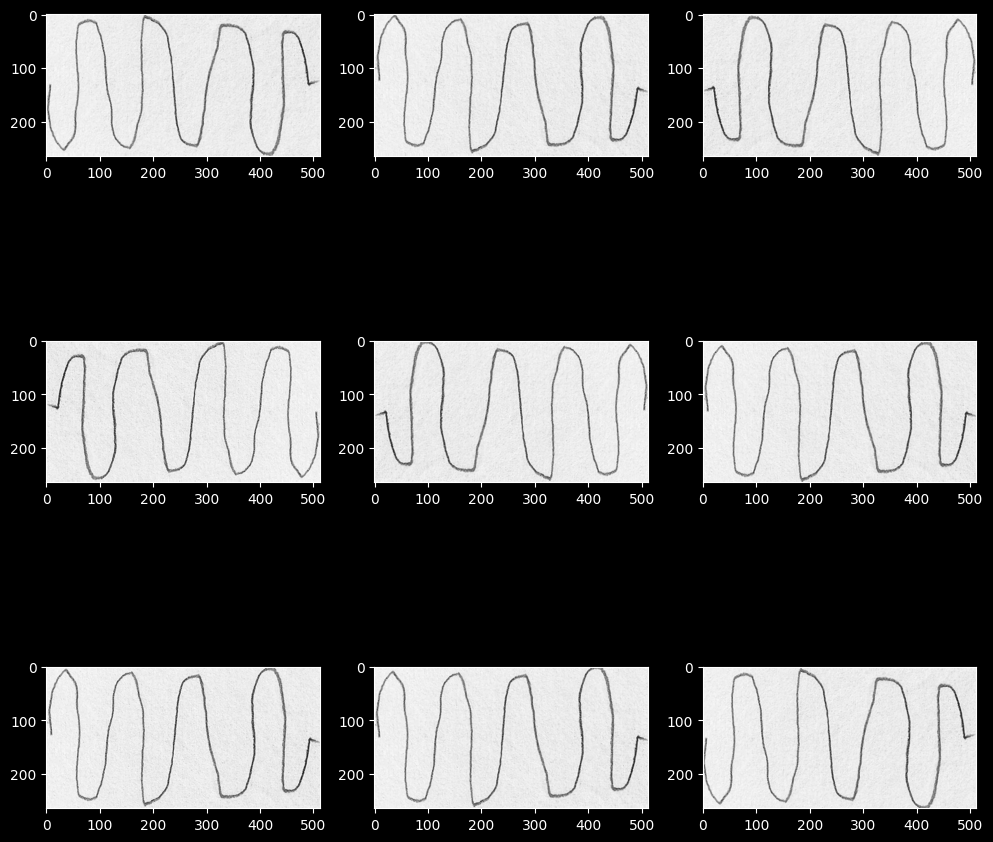

In [23]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/healthy/"+ os.listdir("drawings/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

## Spiral (Parkinson)

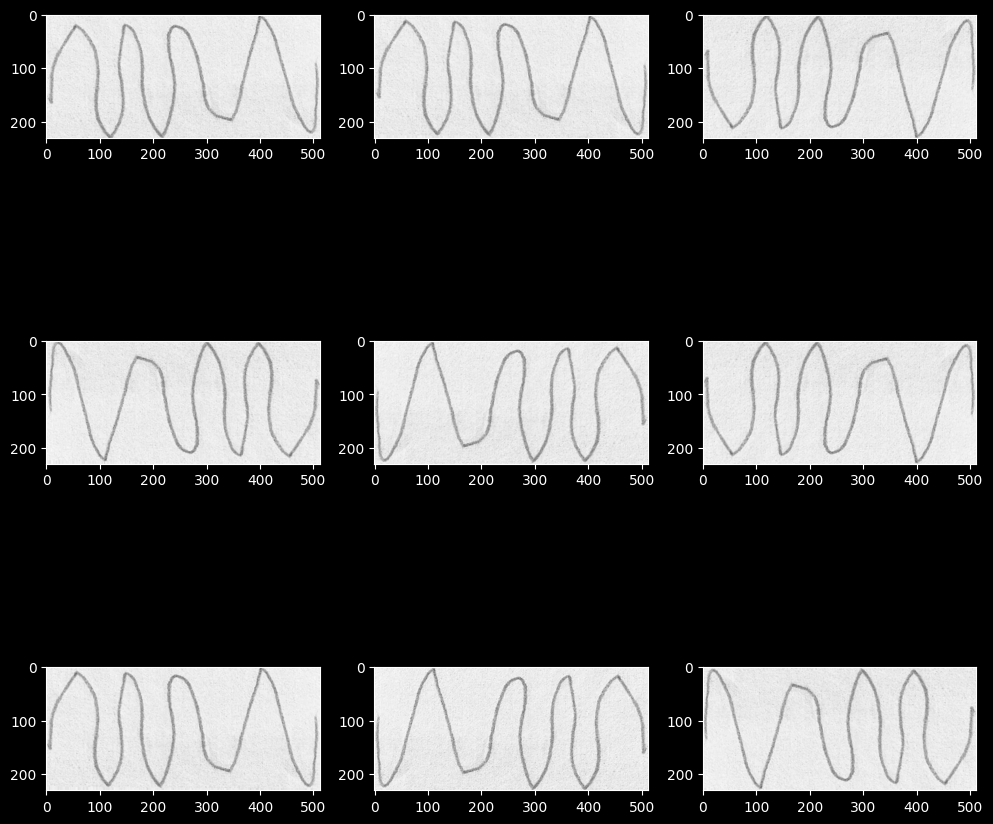

In [24]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/parkinson/"+
                  os.listdir("drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Healthy)

In [25]:
# plt.figure(figsize= (12,12))
# for i in range(1, 10, 1):
#     plt.subplot(3,3,i)
#     img = load_img("drawings/wave/training/healthy/"+
#                   os.listdir("drawings/wave/training/healthy")[i])
#     plt.imshow(img)   
# plt.show()

# # Wave (Parkinson)

In [26]:
# plt.figure(figsize= (12,12))
# for i in range(1, 10, 1):
#     plt.subplot(3,3,i)
#     img = load_img("drawings/wave/training/parkinson/"+
#                   os.listdir("drawings/wave/training/parkinson")[i])
#     plt.imshow(img)   
# plt.show()

# Importing CNN Layers

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building Classifier

In [28]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))


d:\EXtra projects\Parkinsons-disease-prediction-using-CNN-main\Parkinsons-disease-prediction-using-CNN-main\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Building Classifier
classifier = Sequential()

# Add convolutional layer
classifier.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))

# Add pooling layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer (optional, for deeper networks)
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten layer to convert the 2D matrix to a 1D vector
classifier.add(Flatten())

# Add fully connected (Dense) layers
classifier.add(Dense(128, activation='relu'))  # Add a dense layer with 128 neurons
classifier.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (Parkinson's or Healthy)

# Compile the model
classifier.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Image Data Generation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
spiral_train_generator = train_datagen.flow_from_directory(
    'drawings/wave/training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

spiral_test_generator = test_datagen.flow_from_directory(
    'drawings/wave/testing',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 4824 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [33]:
# wave_train_generator = train_datagen.flow_from_directory('drawings/wave/training',
#                                                    target_size = (128,128),
#                                                    batch_size = 32,
#                                                    class_mode = 'binary')

# wave_test_generator = test_datagen.flow_from_directory('drawings/wave/testing',
#                                                    target_size = (128,128),
#                                                    batch_size = 32,
#                                                    class_mode = 'binary')

# Fitting The Model with Data

In [34]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 10

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [35]:
# Compute steps per epoch
steps_per_epoch = spiral_train_generator.n // spiral_train_generator.batch_size
validation_steps = spiral_test_generator.n // spiral_test_generator.batch_size
print(steps_per_epoch)

# Fitting the model with the correct steps per epoch
history = classifier.fit(
    spiral_train_generator,
    steps_per_epoch=steps_per_epoch,  # Ensure this is set based on your dataset size
    epochs=10,
    validation_data=spiral_test_generator,
    validation_steps=validation_steps,  # Ensure this is set as well
    callbacks=callbacks_list
)

150


d:\EXtra projects\Parkinsons-disease-prediction-using-CNN-main\Parkinsons-disease-prediction-using-CNN-main\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 321ms/step - accuracy: 0.4959 - loss: 1.0089 - val_accuracy: 0.4949 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.4688 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 3/10


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 297ms/step - accuracy: 0.5588 - loss: 0.6875 - val_accuracy: 0.5997 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.5938 - loss: 0.6771 - val_accuracy: 0.5625 - val_loss: 0.6721 - learning_rate: 0.0010
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 285ms/step - accuracy: 0.6029 - loss: 0.6549 - val_accuracy: 0.5963 - val_loss: 0.6697 - learning_rate: 0.0010
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.6875 - loss: 0.5838 - val_accuracy: 0.5625 - val_loss: 0.5335 - learning_rate: 0.0010
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 292ms/step - accuracy: 0.7416 - loss: 0.5161 - val_accuracy: 0.7508 - val_loss: 0.4641 - learning_rate: 0.0010
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.7188 - loss: 0.4879 - val_accuracy: 0.7500 - val_loss: 0.4027 - learning_rate: 0.0010
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.8113 - loss: 0.

# Plotting Accuracy and Loss

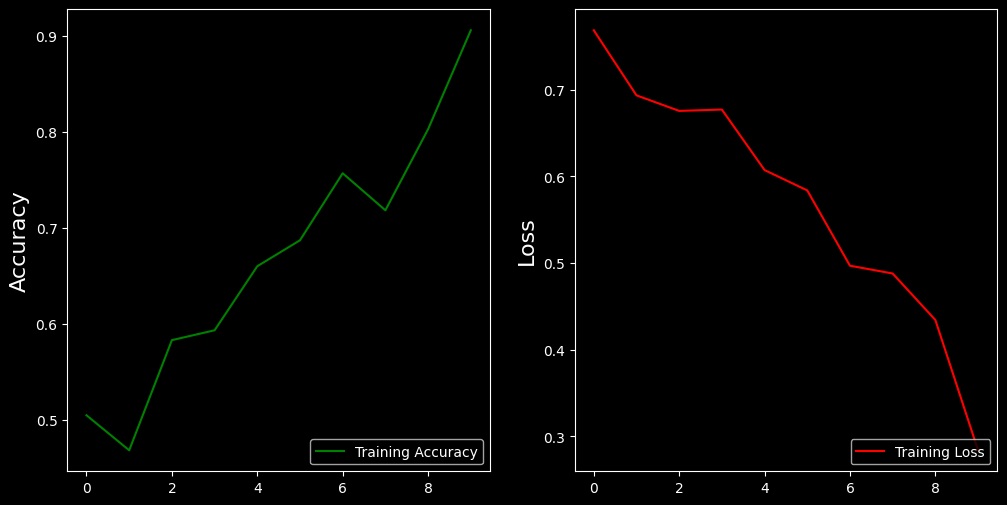

In [37]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()


In [39]:
# Save the model to a file
classifier.save('Models/parkinson_disease_detection_model(wave).h5')


In [18]:
from tensorflow.keras.models import load_model

# Load the saved model
classifier = load_model('parkinson_disease_detection_model(wave).h5')


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess a new image
img = load_img('drawings/MRI/testing/parkinson/3-pl_LOC_002_copy001.png', target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch size
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
prediction = classifier.predict(img_array)

# Print the result
if prediction[0][0] > 0.5:
    print("The model predicts Parkinson's.")
else:
    print("The model predicts Healthy.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The model predicts Parkinson's.
